In [5]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Первые строки
print("Первые 5 строк:")
print(df.head())

# Последние строки
print("Последние 5 строк:")
print(df.tail())

# Информация о структуре
print("Информация:")
print(df.info())
print(df.describe())

# Размер данных
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")

Первые 5 строк:
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80  

In [21]:
missing_values = df.isnull().sum()
print('Количество пропущенных значений:')
print(missing_values)

print(f'Количество дубликатов: {df.duplicated().sum()}')

# Обработка выбросов с помощью z-score
# Выберем числовые колонки для проверки выбросов
num_cols = ['Age', 'Sleep Duration', 'Quality of Sleep',
        'Physical Activity Level', 'Stress Level',
        'Heart Rate', 'Daily Steps']

# Импортируем stats из scipy
from scipy import stats

# Метод z-score
z_scores = np.abs(stats.zscore(df[num_cols]))
outliers = (z_scores > 3).sum(axis=1) > 0
print(f"Количество строк с выбросами (z-score > 3): {outliers.sum()}")

df.describe()

# Корреляционный анализ
print("Корреляционный анализ:")
correlation_matrix = df[num_cols].corr()
print("\nМатрица корреляций:")
print(correlation_matrix)

# уникальные значения
print("Уникальные значения в столбцах категорий:")
cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder', 'Age', 'Sleep Duration', 'Quality of Sleep',
                   'Physical Activity Level', 'Stress Level',
                   'Heart Rate', 'Daily Steps']
for col in cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} уникальных значений")
    print(df[col].value_counts().head())

Количество пропущенных значений:
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Systolic_BP                0
Diastolic_BP               0
dtype: int64
Количество дубликатов: 0
Количество строк с выбросами (z-score > 3): 9
Корреляционный анализ:

Матрица корреляций:
                              Age  Sleep Duration  Quality of Sleep  \
Age                      1.000000        0.344709          0.473734   
Sleep Duration           0.344709        1.000000          0.883213   
Quality of Sleep         0.473734        0.883213          1.000000   
Physical Activity Level  0.178993        0.212360          0.192896   
Stress Level            -0.422344       -0.811023

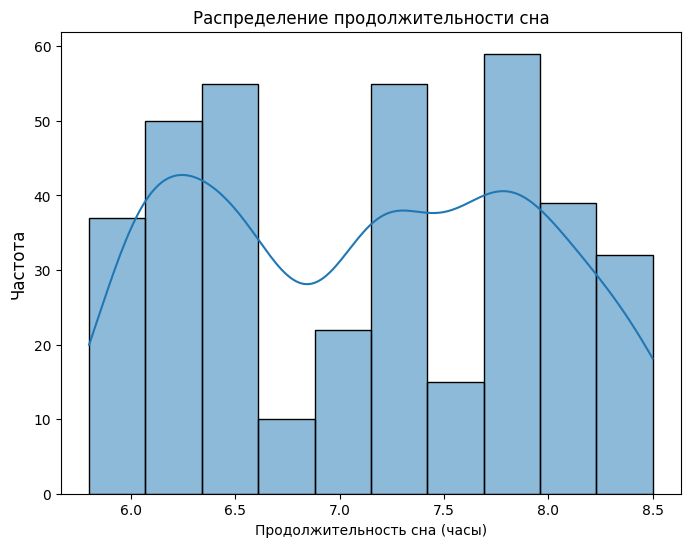

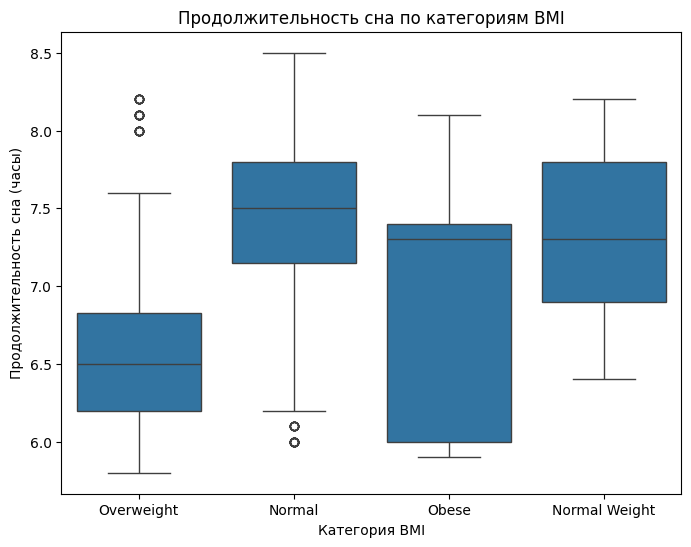

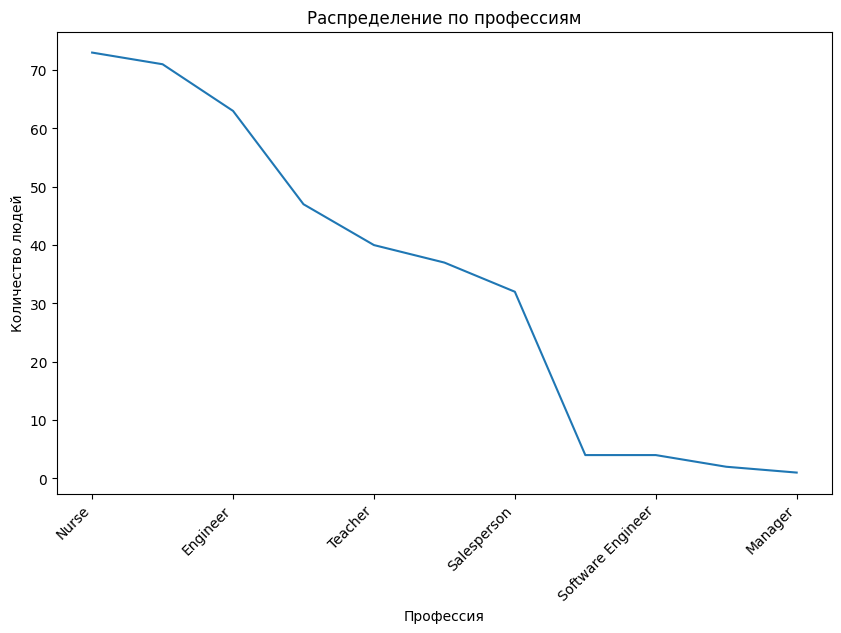

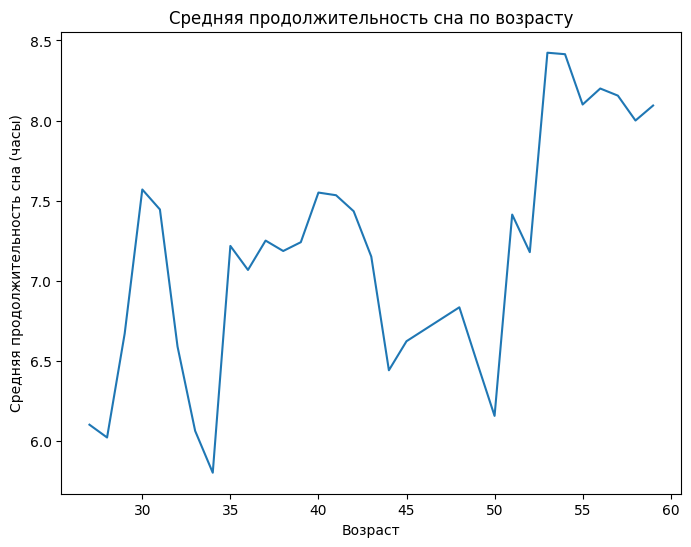

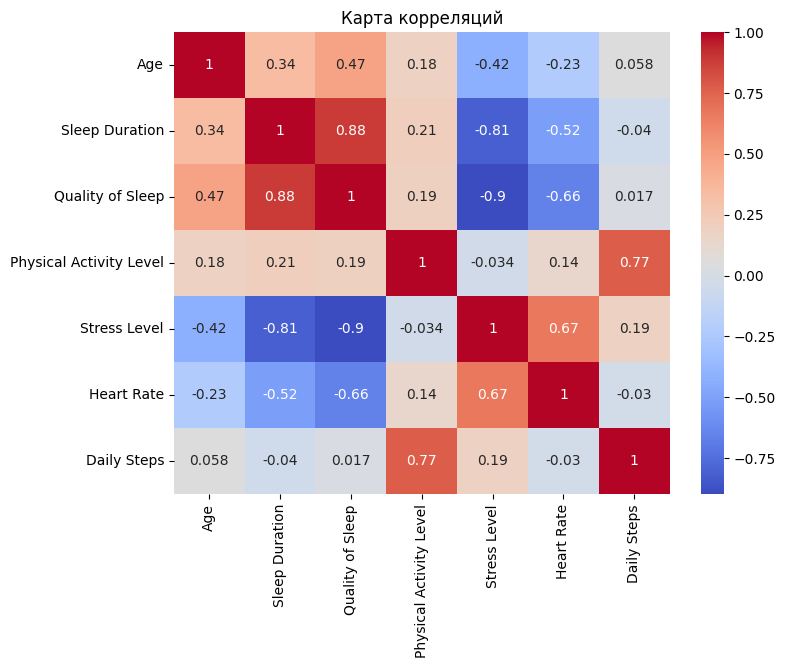

In [28]:
# Гистограмма распределения Sleep Duration
plt.figure(figsize=(8, 6))
sns.histplot(df['Sleep Duration'], kde=True)
plt.title('Распределение продолжительности сна')
plt.xlabel('Продолжительность сна (часы)')
plt.ylabel('Частота', fontsize=12)
plt.show()

# Boxplot для Sleep Duration по BMI Category
plt.figure(figsize=(8, 6))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df)
plt.title('Продолжительность сна по категориям BMI')
plt.xlabel('Категория BMI')
plt.ylabel('Продолжительность сна (часы)')
plt.show()

# Столбчатая диаграмма - количество людей по профессиям
plt.figure(figsize=(10, 6))
df['Occupation'].value_counts().plot()
plt.title('Распределение по профессиям')
plt.xlabel('Профессия')
plt.ylabel('Количество людей')
plt.xticks(rotation=45, ha='right')
plt.show()

# Линейный график - средняя продолжительность сна по возрасту
plt.figure(figsize=(8, 6))
sleep_by_age = df.groupby('Age')['Sleep Duration'].mean()
plt.plot(sleep_by_age.index, sleep_by_age.values)
plt.title('Средняя продолжительность сна по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Средняя продолжительность сна (часы)')
plt.show()

# Heatmap корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Карта корреляций')
plt.show()

In [32]:
# Средние показатели по профессиям
print("Средние показатели по профессиям:")
profession_stats = df.groupby('Occupation').agg({
    'Sleep Duration': 'mean',
    'Quality of Sleep': 'mean',
    'Stress Level': 'mean',
    'Daily Steps': 'mean'
}).round(2)

print(profession_stats)

# Количество людей с нарушениями сна по BMI категориям
print("\n Нарушения сна по BMI категориям:")
sleep_disorder_bmi = pd.crosstab(df['BMI Category'], df['Sleep Disorder'])
print(sleep_disorder_bmi)

# Pivot table: Средний стресс по профессии и полу
print("\n Сводная таблица: Средний уровень стресса")
pivot_table = pd.pivot_table(df,
                            values='Stress Level',
                            index='Occupation',
                            columns='Gender',
                            aggfunc='mean',
                            fill_value=0)
print(pivot_table.round(2))

# Топ 5 профессий с самой высокой физической активностью
print("\n Топ 5 профессий по физической активности:")
top_activity = df.groupby('Occupation')['Physical Activity Level'].mean().sort_values(ascending=False).head(5)
print(top_activity.round(2))

Средние показатели по профессиям:
                      Sleep Duration  Quality of Sleep  Stress Level  \
Occupation                                                             
Accountant                      7.11              7.89          4.59   
Doctor                          6.97              6.65          6.73   
Engineer                        7.99              8.41          3.89   
Lawyer                          7.41              7.89          5.06   
Manager                         6.90              7.00          5.00   
Nurse                           7.06              7.37          5.55   
Sales Representative            5.90              4.00          8.00   
Salesperson                     6.40              6.00          7.00   
Scientist                       6.00              5.00          7.00   
Software Engineer               6.75              6.50          6.00   
Teacher                         6.69              6.98          4.53   

                      Daily S